In [ ]:
# class chat soru: Colab üzerinde TPU ile eğitmiz modeli kendi localimizde çalıştırmayı nasıl yaparız.
# Johnson H: colabin geçici hafızasına atadığı modeli kendi drivinize indirip load_model fonksiyonu ile kullanabilirsiniz (edited) 
# .. TPU ile eğitilmiş modelin CPU veya GPU ile eğitilmiş modelden farkı yok tek farkı modelin daha hızlı eğitilmesi

### BERT

In [ ]:
# NLP nin DL ile kullanılması 2013 lere(RNN) lere dayanıyor.
# LSTM i falan time series lerde kullanılıyor 1997 olmasına rağmen. 2013 te bunu NLP ye uygulamışlar
# Encoder-Decoder: LSTM ve GRU nun birlikte kullanıldığı. Translation, question -answers, digital assistants vs
# .. İçerisinde 1 den fazla LSTM ve GRU modelleri kullanılarak bu işlemleri yapar(Translation vs). Ancak bunlara gerek kalmadı
# .. Transformers lar altyapısında encoder-decoder ları kullanıyor.
# Bi-LSTM : LSTM in çift taraflı çalışması
# Attention: tokenler arasındaki anlamsal ilişkileri çok daha güçlü bir şekilde kuruyor
# Transformers : içinde attention mekanizmaları ve yeni nesil encoder-decoder yapıları var. Encoder a input u veriyoruz, decoder a output u veriyoruz
# BERT : Alt yapısında 12 tane transformers yapısı kullanıyor. 
# Genelde zaten transformers ların oluşturduğu modeller tercih ediliyor. BERT bunlardan birisi

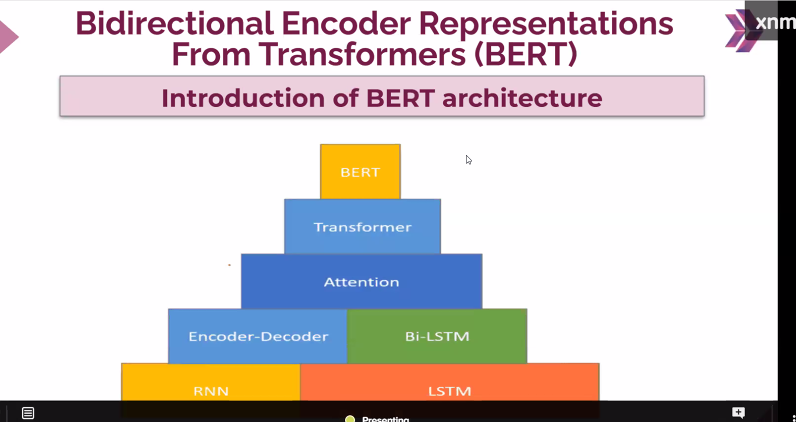

In [ ]:
# Sol taraf encoder yapısı sağ taraf encoder yapısı
# Encoder: Modele input u verdiğim kısım     (input: how are you?)
# Decoder : Modele output u verdiğimiz kısım (output: İyiyim)

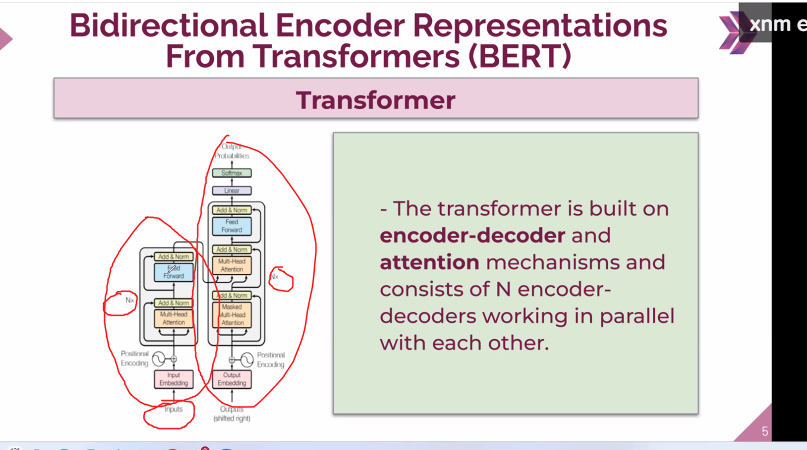

In [ ]:
# Bert modellerinin içerisinde kullanılan transformers yapısı biraz vardı
# .. BERT decoder yerine de encoder kullanıyor.
# Solda encoder a input olarak "what are you doing" diyoruz ve outputda karşılığı geliyor
# ... "was macsht du geralde"

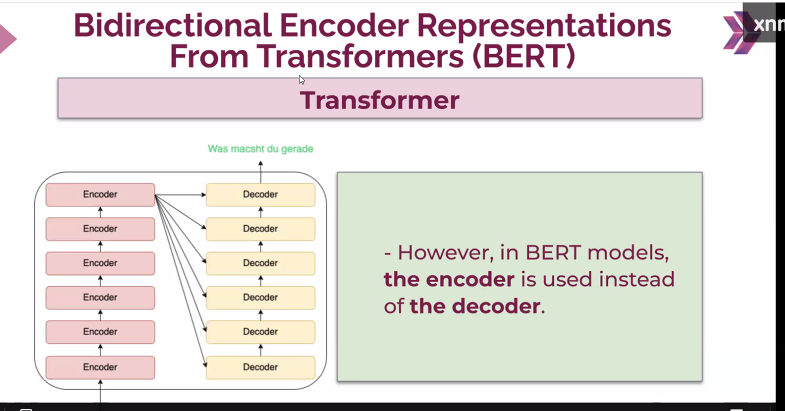

In [ ]:
# Positional embedding
#  Bir modele tokeni verirken embedding şeklinde vereceğim
# .. yani "what time is it" i modele verirken modelde "what" a ait word embedding belli, "time" a ait belli
# .. vs vs.. ve biz bu tokenlerin word embedding bilgisini input olarak veriyoruz. Buna karşılık gelen "ten o'clock"
# .. un word embedding lerini de output a vereceğiz
# Önceden modeller(LSTM ve GRU) seri olarak çalışırlar, yani What a yapacağı bitmeden time a işlem yapmıyor, time a yapacağı işlem bitmeden "is" e işlem yapmıyordu
# Bert, paralel olarak çalışır yani bunları bütün olarak alır "what time is it" i . Bu sefer de şöyle bir handicap ım oluyor. Bu tokenlerin cümlede
# .. kaçıncı sırada olduğunu bilmiyor. Sıralamasını biz positional encoding le bildiriyorum modele
# .. peki modele bütün olarak vermenin ne gibi avantajları var

# Örn: Öğretmen öğrenciye ilk öğretim yılında okuldu çok başarılı projeler yaptı.
# Bunlara klasik LSTM ve GRU yaptığımızda sırayla çalışacak. Ancak LSTM ve GRU anlamsal ilişkileri
# .. birbirine yakın olan tokenlerle daha iyi kuruyordu uzakta kalanlara göre
# BERT de bir bütün olarak beslediğimde "attention" mekanizması sayesinde, birbirine yakın olan tokenlerle değil
# .. sanki cümlenin öğelerine sorular soruyor gibi yakalıyor. Anlamsal ilişkileri cümlenin zarfına, sıfatına bakarak kuruyor
# .. nerede yaptı "okulda".. kim yaptı "öğretmen" . Peki bunu nasıl biliyor? Johnson H: Bunu anlatırsak ders bitmez
# .. Burada unutma problemi yok. Text i bir bütün olarak görüyor burada(LSTM ve GRU da böyle değil)
# Multi-head attention: Anlamsal ilişkileri bir çok farklı şekilde yakalayan mekanizma

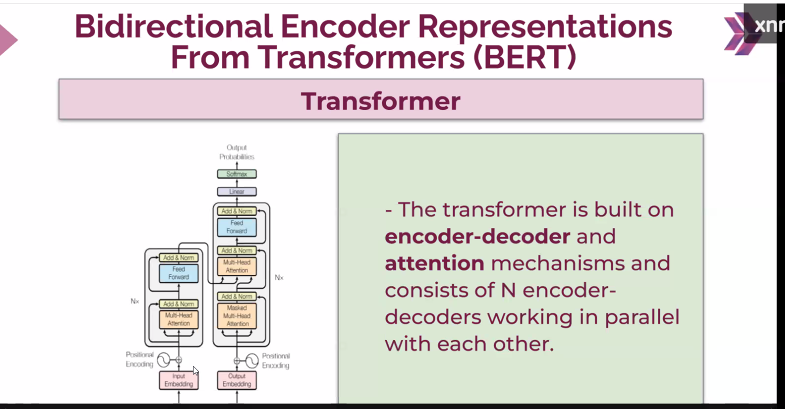

In [ ]:
# Attention anlamsal ilişkileri daha iyi kurar
# Self-attention: 2 token arasındaki anlamsal ilişkinin tek bir yön ile ele alınması(). Öğretmen ve öğrencinin sadece "okul" üzerinden kurulması
# Multi-head attention: sadece "okul" ilişkinin yerine bir çok yön ile kurulması(öğrenci, okul, not)

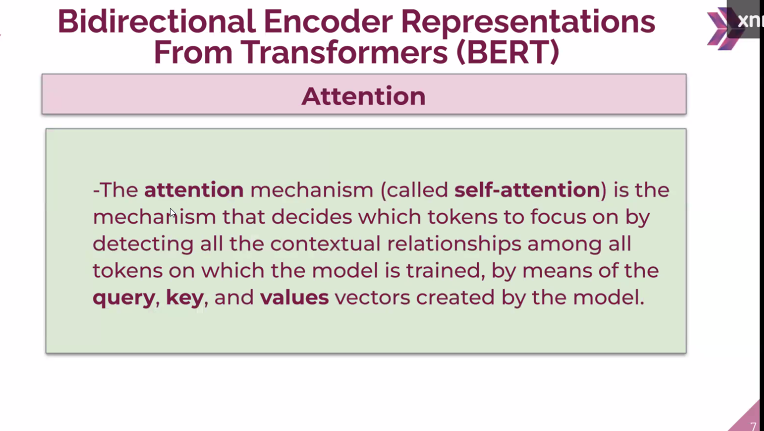

In [ ]:
# Query nin diğer tokenlerle olan ilişkisini öğrenmek istiyorum (Öğretmen)
# Key ilişkili olduğu diğer tokenler(öğrenci, okul, not, ...)
# Value: Hangi text içinde kullanmışsanız query ile en anlamlı tokenler hangisi ise onları sıralıyor
# .. sonra context in içerisindeki yapıya bakarak "öğretmen" ile en ilişkili "öğrenci"(bu value dur) diyor
# Model öğretmen ile en yüksek anlamsal ilişki hangileri ise önce onlara yoğunlaşır.(LSTM ve GRU bütün tokenlere yoğunlaşıyordu)
# .. Böylece çalışma maliyeti azalmış olur

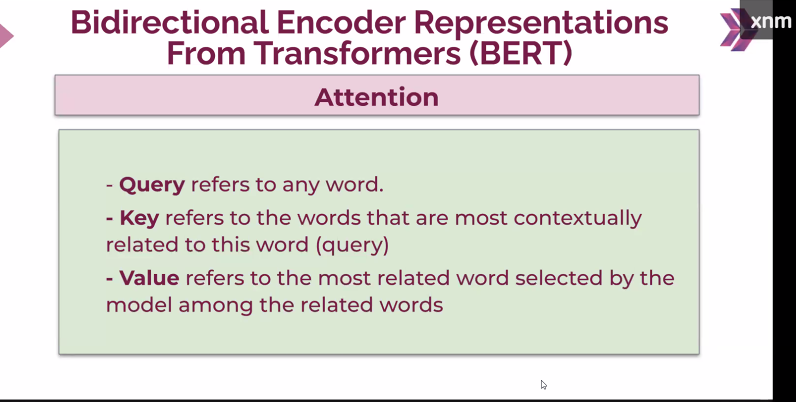

In [ ]:
# 3. ders
# 2 cümle özelinde "it" in hangi tokenlerle anlamsal ilişkisi olduğunu tespit ederken;(Eğitimi bitmiş bir modelden)
# Benim modelim eğitildi ve modelim ne öğrendi? (it was too tired). Canlı bir şey yorgun olur, cansız bir şey yorgun olamaz der
# .. Sonra modelim "tired" dan dolayı "it" ile "animal" arasındaki ilişkiyi kuruyor
# birinci cümlede de "long" olan ancak bir "street" dir der ve modelim "long" dan dolayı "it" ile "street" arasındaki ilişkiyi kuruyor

# Yani model cümleyi bir bütün olarak gördüğü için anlamsal ilişkiyi daha iyi kuruyor. Burada hangi token yakında, uzakta diye bakmıyor
# .. önceki modeller için

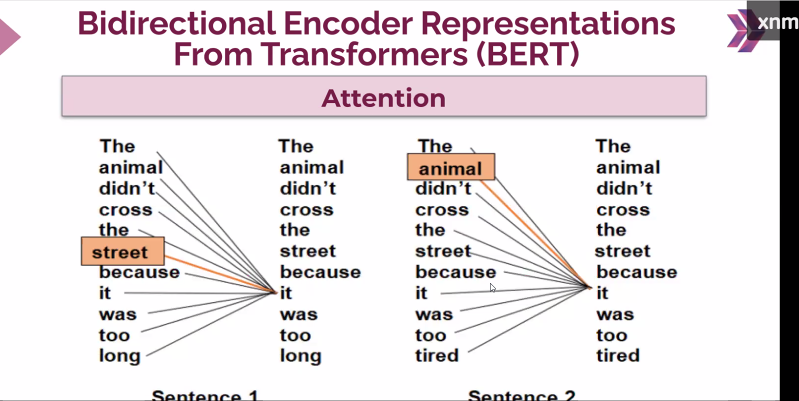

In [ ]:
# Multi-head attention: Ilişkinin yerine bir çok yön ile kurulması
# Bütün tokenlere hakim olduğu için model öğretmen-öğrenci, öğretmen-not verme, öğretmen-okul vs yi görüyor
# .. ve bu tokenlere odaklanıyor "öğretmen" için

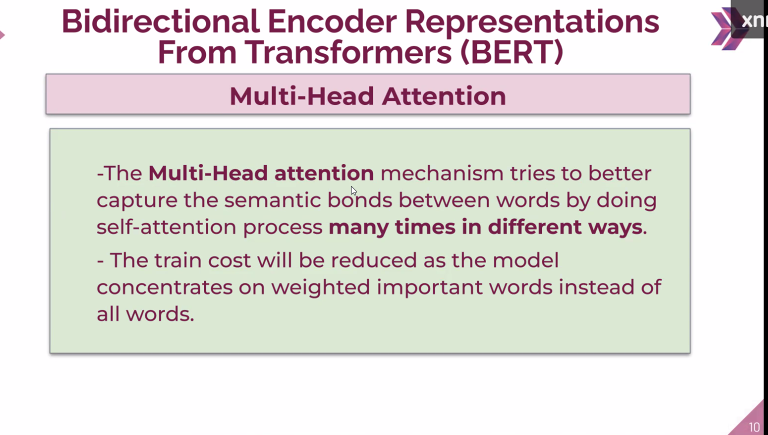

In [ ]:
# En iyi mekanizmalar transformerslardır(NOT: 512 tokenden fazlasını alamıyor şu an. Eğer daha çok geliştirilirse
# .. unutma probleminin ortadan kaldırılabileceği söyleniyor)
# 

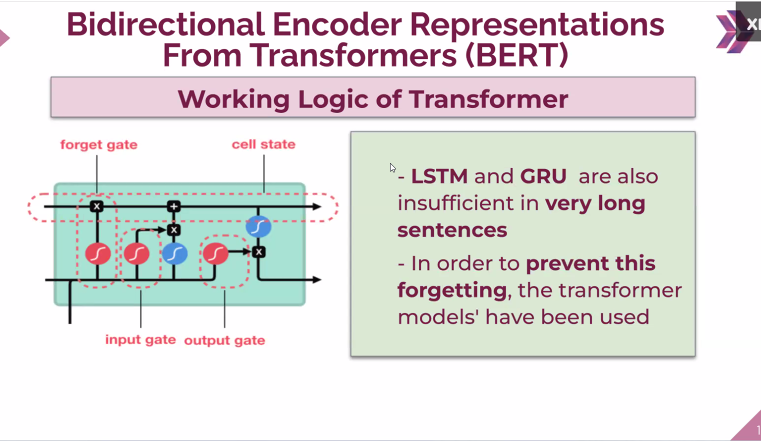

In [ ]:
# Modelim anlamsal ilişkileri o kadar iyi yakalamış ki;
# "You -- I " ile anlamsal ilişki kurmuş
# "are -- am" ile anlamsal ilişki kurmuş
# .... vs vs
# "You" geldiğinde "I" ı kastettiğini anlayıp "I" ı getiriyor önümüze model

# Peki model sadece bundan dolayı mı bu kadar başarılı? Hayır. Ayrıca;
# Diyelim model eğitilirken bir text im var diyelim
# Her bir cümlede örneğin 200 tokenin %15 ini alır. Bu 30 tokenin(%15 in) %80 ini maskeler % 10 unu olduğu gibi bırakır %10 unu da başka bir tokenle değiştirir
# Yani eğitim devam ederken arka planda "loss" u da günceler. Eski modeller için mesela öğrenciyi sınava hazırlarken sürekli sorular çözdürüyorum
# .. hiç bir deneme yapmamış ve sadece üniversite sınavına giriyor. BERT böyle yapmıyor. Eğitim sırasında 100 tanesini alıyor
# .. deniyor. Sonra başka alıyor deniyor. Yani eğitim esnasında arkada yapması gereken başka bir şey varsa bir yönden onları ayarlıyor arkada
# Özetle; Eğitim devam ederken modeli bir yandan denemelere/teste tabi tutuyor(yani eğitimin bitmesini beklemiyor) bu yüzden sonuçları daha iyi geliyor diğer modellere göre
# .. sürekli bulduğu loss değerindeki azalış ve artışa göre tekrar denemeler yapıyor

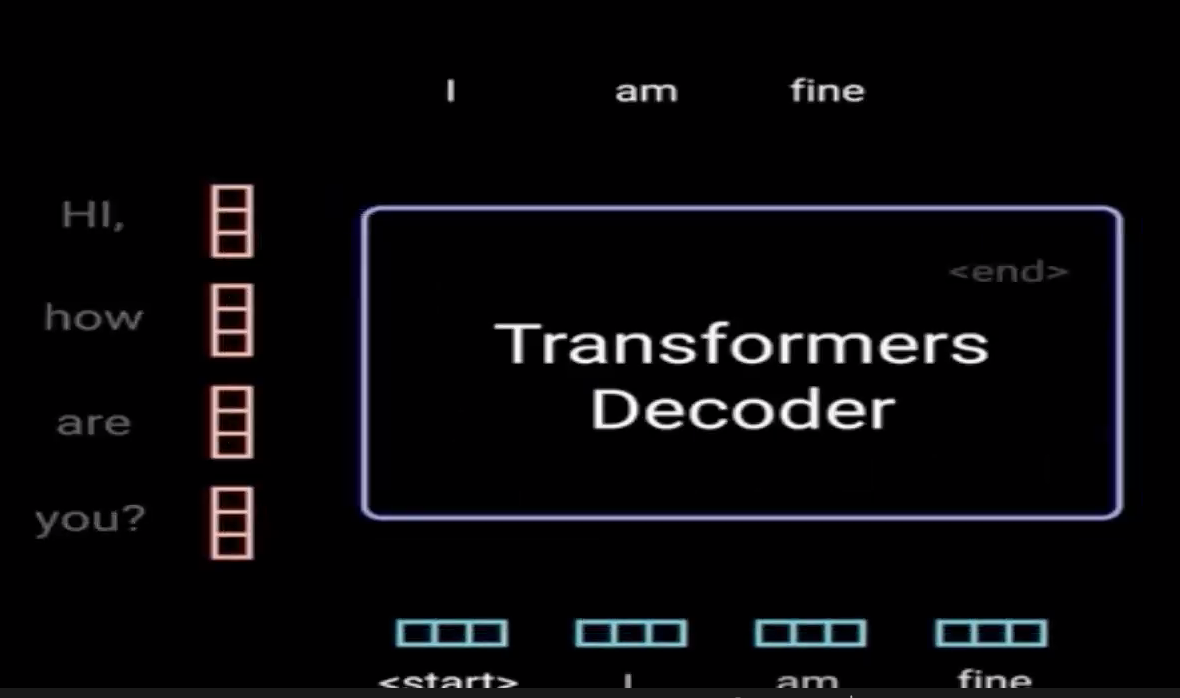

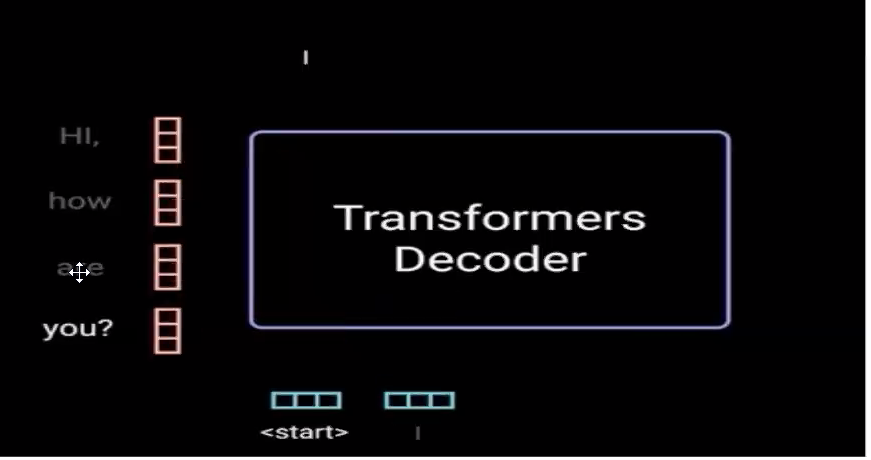

In [ ]:
# Transformers ların çıkışı NLP için bir devrimdir
# BERT Base : 12 layer kullanır. her transformers bloğunda 6 encoder 6 decoder kullanır. 110 milyon parametre ile işlem görmüş(eğitilmiş) modelimiz
# BERT Large : 24 .... 

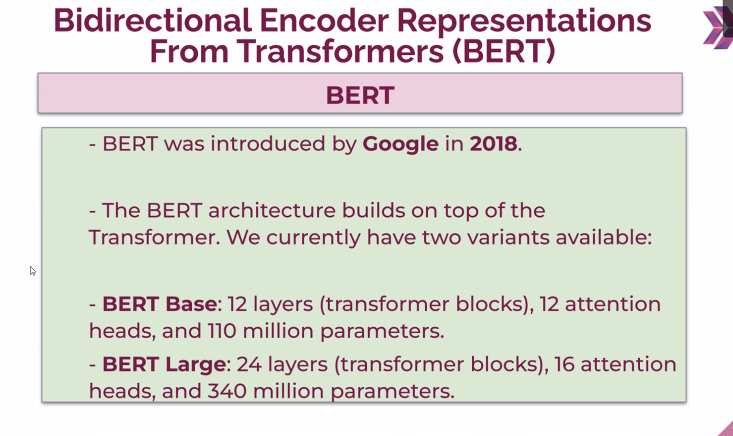

In [ ]:
# Bert modellerin başarılı olmasının sebeplerinden biri dde cümleleride tahmin ettiriyor. 
# Bir cümleden sonra diğer cümle ne olabilir onu da tahmin ediriyor(NExt sentence prediction). Bunu da
# .. yine eğitim aşamasında yapıyor.

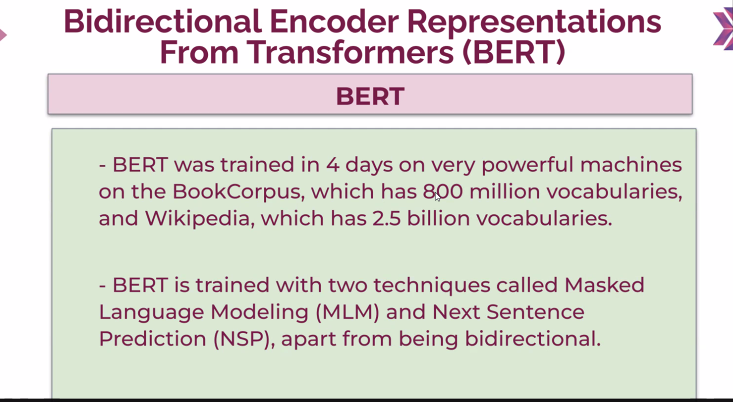

In [ ]:
# CLS : Bir cümlenin başlangıcını gösterir
# SEP: Bir cümlenin bittiği yeri gösterir
# BERT bunu mutlaka ister. Bunu yapmazsanız BERT model hata verir
# MASK : Maskelediği token. Bakalım eğitimden sonra bu MASK ları doğru tahmin edecek mi model?
# .. eğitim devam ederken. Altta 2 tane mask var üstte 3 tahmin(MLM classifier) var. üçüncüsü ya bir token aynı tahmin edilmiş ya da 
# .. değiştirilmiş o yüzden 3 tane
# Aynı anda model bu işlemleri yaparken bir sonraki cümleyi de tahmin etmeye çalışıyor(SEP den sonraki kısım)

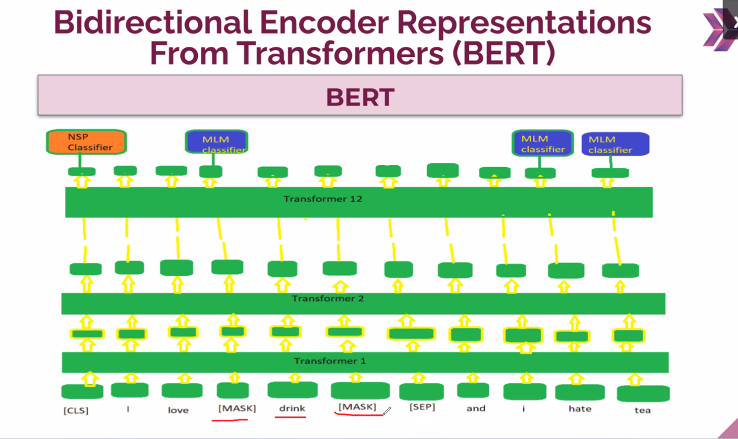

In [ ]:
# "Apple" örneği verilmişti bu soldan sağa ve sağdan sola durumunu anlatmak için

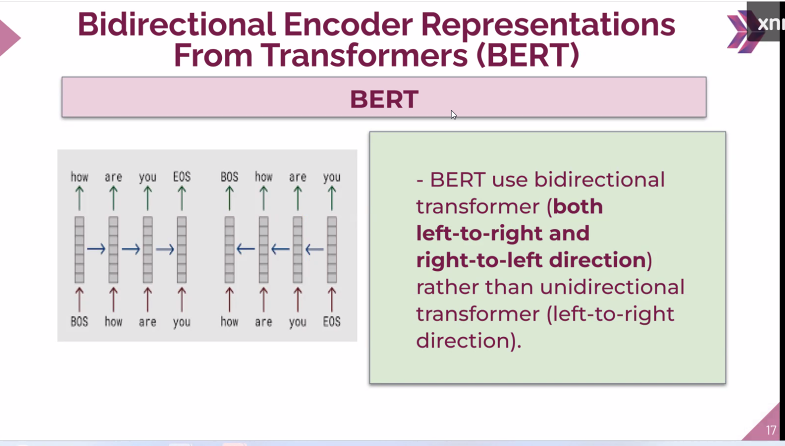

In [ ]:
# BERT in kullanıldığı alanlar

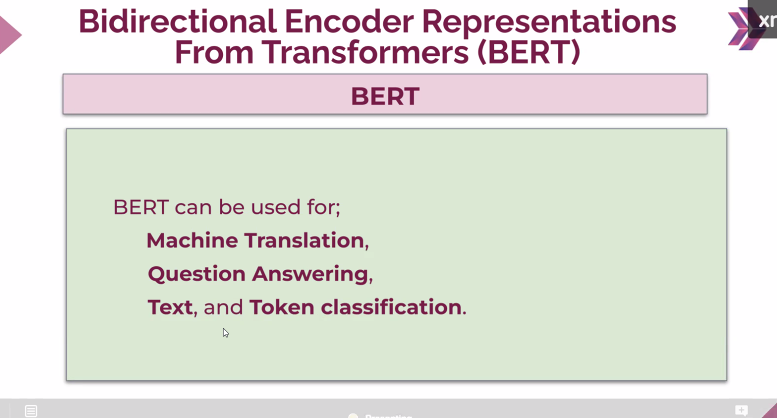

In [ ]:
# BERT in de sınırları var
# Eğitim için kullanacağı max token sayısı 512 dir.. Başka bir deyişle;
# .. Bir satırda eğitim için verilebilecek max token sayısı 512 dir.
# Kullandığımız word embedding boyutları 768(bert-base) , 1024(bert-large)
# DL modellerinde, RNN modellerinde olduğu gibi bütün tokenler modelle sabit uzunlukta olmalı.(Göreceğiz)

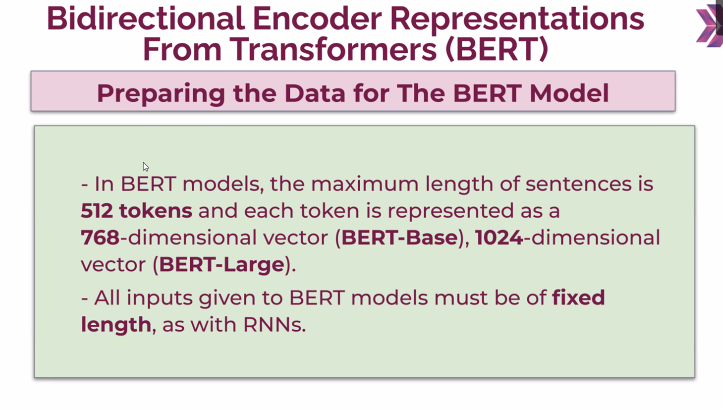

In [ ]:
# wordpiece: Bir cümle içerisindeki kelimeleri tokenlere ayırırken köklerini ve eklerini ayırarak her bir kelime için bir word embedding döndürür
# Strawberry: çilek , straw = x, berry =y ise bunları ağırlandırıp yeni bir word embedding(z) elde ediyor
# araba: a, cı:b, sigorta : c, sigortacı: d, ..... hafızamızda çok fazla token tutma zorunda kalıyoruz
# .. ancak wordpiece de , arabacı geçersek araba ya ait "a" ile cı ya ait "b" yi alıp ağırlandırılmış şekilde birleştirecek
# .. Yani "araba" ve "arabacı","sigorta", "sigortacı" yı ayrı ayrı tutmayacak. İhtiyacı olan "a" yı, "b" yi "c" yi vs alacak.
# .. Eğer bütün tokenlerle eğitim yapılsaydı aklında çok fazla token tutmak zorunda kalırdı. BERT bunu da sağlıyor bize ve daha az token
# .. tutuyor hafızada. Çünkü hafızada ekleri ve kökleri ayrı ayrı tuttuğu için her kelime için bir word embedding döndürür
# 

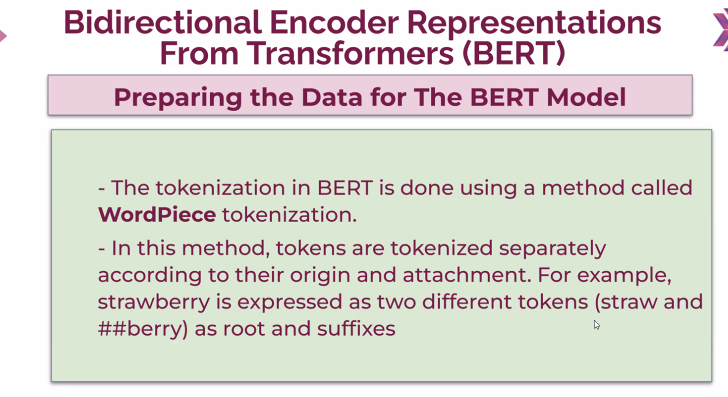

In [ ]:
# my: bert modelinde 20. token
# dog : bert modelinde 300 token
# NOT: CLS : 2, SEP:3 tür. Bunlar sabittir
# Verilen bir texti BERT de hafızasındaki 30500 tokeni kullanarak sayısallaştırılıyor
# BERT bizden 3 vektör ister. BERT modelindeki en zor kısım burası. Notebook da daha iyi anlaşılacak

# Token Embeddings : Text in nümerik forma dönüştürülmesi(DL ile aynı)(Hafızada tokenim kaçıncı sırada)
# Segmen Embeddings: Classification ve sentiment analizde kullanmayacağız çünkü classification da vs 2 farklı cümle olmayacak
# .. eğer 2 cümle vermek zorunda kalsaydım inputlarımı ve outputları göstermek zorundaydım.
# .. Bu vektörü ama "translation", "question-answers", "diğer cümleyle benzer" vs gibi bir uygulama şey olsaydı
# .. EA lar benim inputlarım olacak, EB lerde benim outputlarım olacak. Inputlar 0, outputlar 1 . Model bunları bilmezse
# .. inputları hangi encoder a göndereceğini , outputları ..... göndereceğini bilemez(Bunu kullanmayacağız biz çünkü sadece classification ve sentiment yapacağımız için)
# Position Embedding : Modelimin gerçekteki uzunluğunu bildiriyor. Her tokene 1 numarası atar ve  o
# .. 1 leri sayar ve sadece 1 lere işlem yapacak. Hangi tokenlere işlem yapacağını bilecek kalanı 0 ile dolduracak(token olmayan yerlere)
# .. Örneğin 10 token var diyelim.Bunların hepsi 1 ile işaretli.
# .. Modele Sen sadece 1 lerle işaretli olanlara işlem yap, 0 lara işlem yapma diyoruz
# 

# class chat soru: Hocam translate gibi bir işlem için Segment Embeddings yapsaydık
# .. he likes playing yerine, ilk cümlenin Türkçesini mi vermiş olacaktık?
# Johnson H: Evet. translation yapsaydık "input" : my dog is cute olacaktı, output um: benim köpeğim sevimli olacaktı

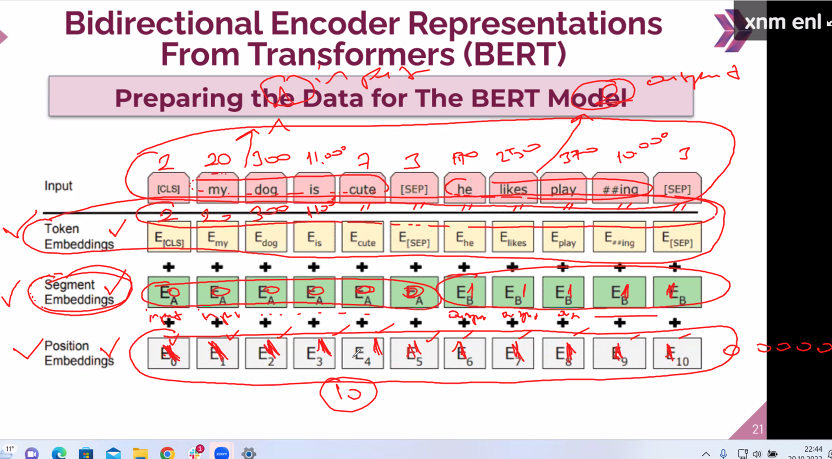

In [ ]:
# Notebook larda InputID olarak göreceğiz bunu
# Tokenlere verdiğimiz ID numaraları
# Tokenlerine ayırıyorum.
# 30522 --> Bert in hafızasındaki unique token
# "I" karşılık gelen numara örneğin "100", "like" a "20" vs
# ... Modelim BERT den geldiği için 768 boyutlu modelimde word embeddingleri biz çekeceğiz(Bunlar zaten belli)

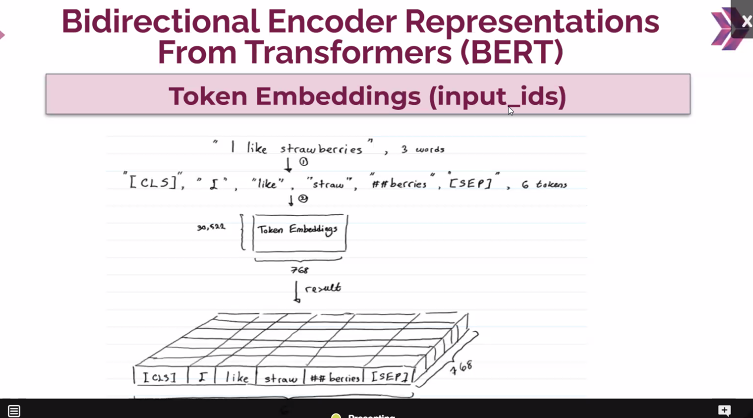

In [ ]:
# İnputlara 0 , outputlara 1 verdi. Bunların ayrımlarını yaptı


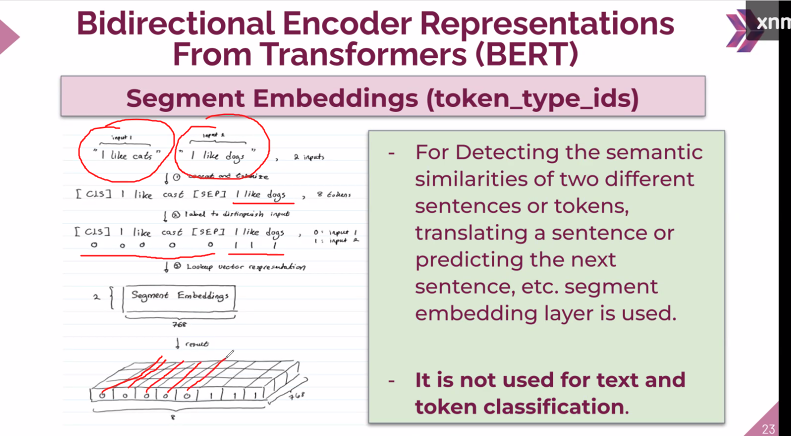

In [ ]:
# Modelin gerçek uzunluğu ne bunu tespit ediyoruz
# Her tokene "1" numarasını veriyoruz ve 1 rakamı verdiklerim arasında anlamsal ilişkiler kursun

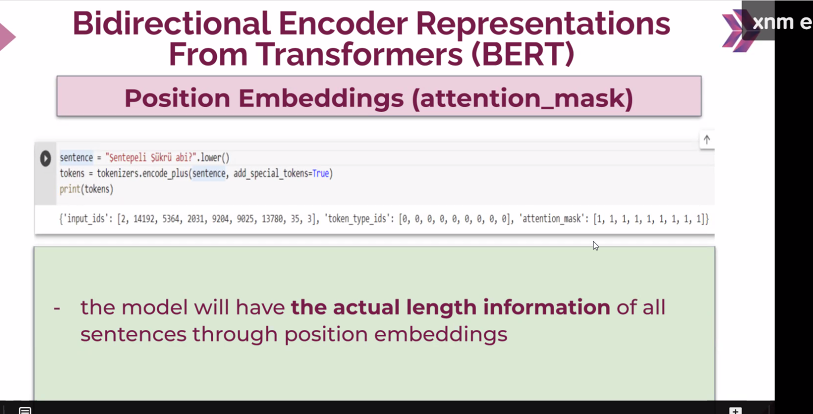

In [ ]:
# class chat soru: sormak istediğim dersin başında tokenleri paralel verdiğimiz için sırasını bilmiyor. sırayı vermemiz lazım demiştiniz onu sormuştum hocam bu sırayı nasıl veriyoruz?
# Johnson H: Position encoding le bert modelime hangi sırada olduğunu söylüyor
# class chat soru: positional encoding ile positional embedding kavramları karıştı Hocam
# Johnson H: positional encoding: bütün tokenleri aynı anda tokenleri verdiğimiz için positional encoding le tokenlerin hangi sırada olduğunu anlıyor
# .. positional embedding : Hangi tokenlere işlem yapacağım(1 ile işaretlilere(gerçekten var olan tokenlere) işlem yapacak, 0 la işaretlilere(padding yapılanlara) işlem yapmayacak)
# .. "what time is it ?" # Positional encoding vasıtasıyla "what":1. sırada, time:2. sırada is:3. sırada it:4. sırada ?: 5. sırada ... ya bakar. (NOT: Bunu kendisi yapıyor. parametre olarak vermiyoruz)
# .. positional embedding "1 1 1 1 1"  ile doldurma işlemi  i de kendisi yapıyor(NOT: Bunu da kendisi yapıyor. parametre olarak vermiyoruz)
# .. Sonuç olarak : 1-2-3-4-5 işlemine de encoding .. 1-1-1-1-1-0-0-0 işlemine de embedding 

# class chat soru: Hocam query, key ve value vektörlerini tekrar açıklayabilir misiniz?
# query : Hangi tokenle anlamsal ilişkiyi tespit etmeye çalışıyorum("it" query)
# key   : Bunlarla en anlamsal ilişki kurduğum tokenler
# value : "it was so tired" da "it" için --> "animal" tokeni value değerim

Johnson-Instructor
  11:57 AM
@channel Merhaba arkadaşlar. Dün dersimizde kafa karışıklığına neden olan positional encoding ve positional embeddings konularına ilave açıklama getirmek istiyorum.
Klasik transformer mimarisinde kullanılan positional encoding cümledeki tokenlerin sıralama bilgisini modele verir. Buradaki sıralama bilgisi tokenlerin word embedinglerinin içine işlenir.
Positional embeddings ise  modelin işlem yapacağı tokenleri belirlemek için kullanılır ancak altyapısında transformers kullanan bazı modeller positional encoding'in yaptığı gibi positional embeddingslerdeki 1 numaralarının içine  tokenlerin position bilgilerine de ilave eder. İlave etmesinin sebebi ise developerların bu şekilde modellerin daha iyi öğreneceğini düşünmelerinden kaynaklanıyor.
Okuduğunuz kaynaklarda genellikle positional embeddingin işlem yapılacak tokenleri belirlemede kullanıldığı yazmaz ve sadece tokenlerin sıralamasını verir bilgisi yer alır. Daha doğrusu positional encoding ve positional embeddings farklarına detaylı değinilmediğinden kafa karışıklığı olabiliyor.
BERT modellerinde hem positional encodings hem de positional embeddings kullanılır.
Bilginize. (edited) 